---
Authour: Sangin Kim
Date   : 21 July 2023
---

# 2.4 Random Walk

'술취한 바퀴벌레' 문제라고도 한다. 다음과 같은 격자에 술취한 바퀴벌레가 있다고 해보자.

| . | . | . | . |
|---|---|---|---|
| . | . | . | . |
| . | . | . | . |
| . | . | . | . |

바퀴벌레는 임의의 한 점에서 시작하여서 임의의 방향으로 움직이게 된다. 이미 지나갔던 자리에 다시 갈 수 있으며 프로그램은 바퀴벌레가 각 위치에 몇번 갔는지 기억하여야 한다. 프로그램은 바퀴벌레가 모든 지점에 적어도 한번 이상 도달하였을 경우 끝난다. 바퀴벌레는 가로, 세로, 대각선으로 한칸 씩만 움직일 수 있으며, 바퀴벌레가 움직이는 방향을 랜덤하게 만드는 것은 각자가 생각해 보도록 한다.

---

## (1) Walker's direction

바퀴벌레는 아래와 같이 여덟 방향으로 움직일 수 있다.

 | ⇖ | ⇑ | ⇗ |
|---|---|---|
| ⇐ | . | ⇒ |  
| ⇙ | ⇓ | ⇘ |

각 방향에 해당하는 어레이 (array) 상 인덱스 방향성은,

⇖: (-1,-1) / ⇑: ( 0,-1) / ⇗: ( 1,-1)

⇐: (-1, 0) / _______ / ⇒: ( 1, 0)

⇙: (-1, 1) /  ⇓: ( 0, 1)  / ⇘: ( 1, 1)

## (2) Define `init()` function

In [5]:
import numpy as np
def init(nrow, ncol):
    # Grid configuration
    grid = np.zeros((nrow,ncol),dtype=np.int8)

    # Initial position
    x_init = np.random.randint(3)
    y_init = np.random.randint(3)
    grid[y_init, x_init] += 1

    # Others
    directions = ((-1,-1), ( 0,-1), ( 1,-1), (-1, 0), ( 1, 0), (-1, 1), ( 0, 1), ( 1, 1))
    trace_pos=[]
    trace_dir=[]
    trace_grid=[]

    return((grid, x_init, y_init, directions, trace_pos, trace_dir, trace_grid))

## (3) Define `main()` function

In [7]:
def main(nrow, ncol, show=True):
    # Initialize
    grid, x_init, y_init, directions, trace_pos, trace_dir, trace_grid = init(nrow, ncol)

    # Conserve initial position
    x_next = x_init
    y_next = y_init

    # Print while function is running
    if show:
        print(grid)
        print("")

    # Store initial grid and position
    trace_grid.append(grid.copy())
    trace_pos.append((x_next,y_next)) 

    # Moving start
    i = 0
    
    # Loop for each step
    while True:
        i += 1 # step increases

        # Moving within boundary condition
        while True:
            direc_idx = np.random.randint(8)
            direc = directions[direc_idx]
            x_test = x_next + direc[0]
            y_test = y_next + direc[1]
            if (x_test >= 0 and x_test < ncol) and (y_test >= 0 and y_test < nrow):
                x_next, y_next = x_test, y_test
                break
        
        # Update grid, position, direction
        grid[(y_next,x_next)] += 1
        trace_pos.append((x_next,y_next)) 
        trace_dir.append(direc)
        trace_grid.append(grid.copy())

        # Print
        if show:
            print(grid)
            print("")

        # Check there is any 0 in grid
        if (grid != 0).all():
            break

    
    return(dict(grid=trace_grid, position=trace_pos, direction=trace_dir, steps=i))

## (4) Testing `main()` function

### - 4 x 4 grid

In [34]:
test_4x4 = main(ncol=4, nrow=4, show=False) # `show=True` to print each steps

#### Print results of 3 heads and 3 tails

In [35]:
print("""
  > grid:""")
print(test_4x4["grid"][:3])
print("""    .
    .
    .""")
print(test_4x4["grid"][-3:])


  > grid:
[array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0]], dtype=int8), array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0]], dtype=int8), array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 1],
       [0, 0, 1, 0]], dtype=int8)]
    .
    .
    .
[array([[ 0,  2,  3,  1],
       [ 0,  2,  6,  6],
       [ 3,  9, 11,  7],
       [ 4, 10, 11,  3]], dtype=int8), array([[ 0,  2,  3,  1],
       [ 1,  2,  6,  6],
       [ 3,  9, 11,  7],
       [ 4, 10, 11,  3]], dtype=int8), array([[ 1,  2,  3,  1],
       [ 1,  2,  6,  6],
       [ 3,  9, 11,  7],
       [ 4, 10, 11,  3]], dtype=int8)]


In [36]:
print("""
  > position:""")
print(test_4x4["position"][:3])
print("""    .
    .
    .""")
print(test_4x4["position"][-3:])


  > position:
[(1, 2), (2, 3), (3, 2)]
    .
    .
    .
[(0, 2), (0, 1), (0, 0)]


In [37]:
print("""
  > direction:""")
print(test_4x4["direction"][:3])
print("""    .
    .
    .""")
print(test_4x4["direction"][-3:])


  > direction:
[(1, 1), (1, -1), (0, -1)]
    .
    .
    .
[(-1, -1), (0, -1), (0, -1)]


In [38]:
print("> steps:"+str(test_4x4["steps"]))

> steps:79


### - 10 x 10 grid

In [39]:
test_10x10 = main(ncol=10, nrow=10, show=False) # `show=True` to print each steps

#### Print results of 3 heads and 3 tails

In [40]:
print("""
  > grid:""")
print(test_10x10["grid"][:3])
print("""    .
    .
    .""")
print(test_10x10["grid"][-3:])


  > grid:
[array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int8), array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int8), array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0

In [41]:
print("""
  > position:""")
print(test_10x10["position"][:3])
print("""    .
    .
    .""")
print(test_10x10["position"][-3:])


  > position:
[(2, 2), (3, 2), (2, 2)]
    .
    .
    .
[(1, 8), (0, 8), (0, 9)]


In [42]:
print("""
  > direction:""")
print(test_10x10["direction"][:3])
print("""    .
    .
    .""")
print(test_10x10["direction"][-3:])


  > direction:
[(1, 0), (-1, 0), (0, 1)]
    .
    .
    .
[(-1, -1), (-1, 0), (0, 1)]


In [43]:
print("> steps:"+str(test_10x10["steps"]))

> steps:1710


## (5) Plot histogram of steps from 1000 trials for 4x4 grid

steps = "How long does the walker survive?"

In [45]:
ndim = 4   # 4x4
steps=[]
for i in range(1000):
    steps.append( main(ndim,ndim,show=False)["steps"] )

In [49]:
import matplotlib.pyplot as plt

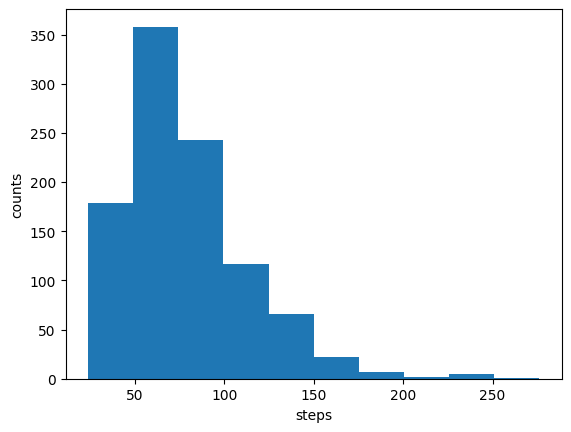

In [48]:
plt.hist(steps)
plt.xlabel("steps")
plt.ylabel("counts")
plt.show()

## (6) Plot histogram of steps from 1000 trials for 4x4 ~ 10x10 grids

In [50]:
ndims=[]
trial_dims=range(4, 11)
for n in trial_dims:
    ndim = n
    steps_temp=[]
    for i in range(1000):
        steps_temp.append(main(ndim,ndim,show=False)["steps"])
    ndims.append(steps_temp)

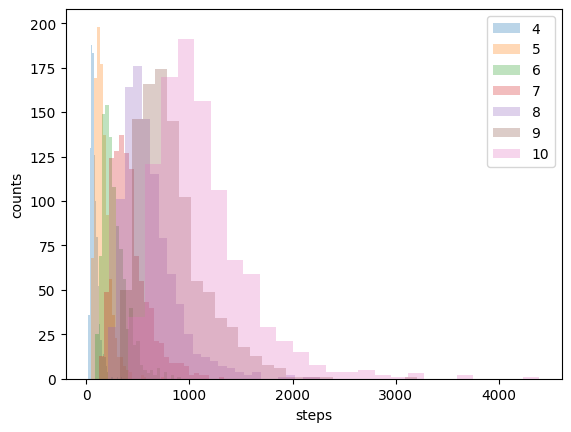

In [51]:
for i in range(len(ndims)):
    plt.hist(ndims[i], bins=25, alpha=0.3, label=list(trial_dims)[i])
plt.xlabel("steps")
plt.ylabel("counts")
plt.legend()
plt.show()